In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvf /content/drive/MyDrive/moic-ai/Training/train_원천데이터.tar

In [ ]:
%cd /content/원천데이터/레트로
!ls

In [ ]:
! pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

## Video 에서 Frame 추출


In [1]:
def video_to_frame(video_path, size, num_frame):
    cap = cv2.VideoCapture(video_path)
    total_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    sel_ind = np.linspace(0, total_frame-1, num_frame).astype("int")

    num=0
    frames = []
    for i in range(total_frame):
        if i in sel_ind:
            res, frame = cap.read()

            frame = cv2.resize(frame, size, interpolation = cv2.INTER_CUBIC)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(frame)
        else:
            res = cap.grab()

        
    cap.release()
    frames = np.asarray(frames)

    return frames

## SIFT 특징점 추출 코드

In [ ]:
def computeSIFT(data, dense=False):
    x = {}
    for i in range(0, len(data)):
        if dense:
            sift = cv2.SIFT_create()
            img = data[i]
            step_size = 8
            kp = [cv2.KeyPoint(x, y, step_size) for x in range(0, img.shape[0], step_size) for y in range(0, img.shape[1], step_size)]
            kp, desc = sift.compute(img, kp)
        else:
            sift = cv2.SIFT_create()
            img = data[i]
            kp, desc = sift.detectAndCompute(img, None)
        x.update({i : desc})

    return x

## 2.OpenCV로 이미지 로드

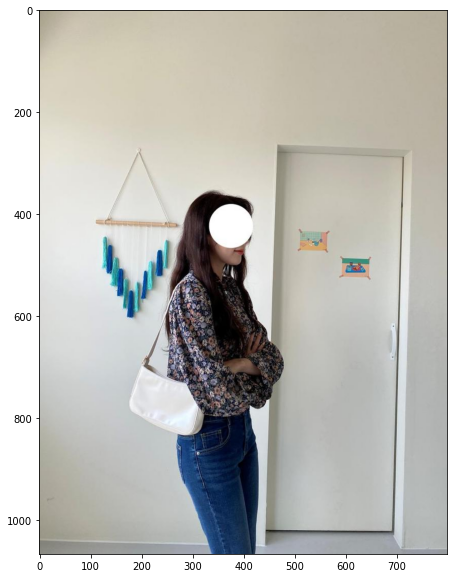

In [ ]:


default_dir = '/content/원천데이터'
img = cv2.imread(os.path.join(default_dir, '레트로/(116)IMG_1.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
from PIL import Image

path = ('/content/(131)IMG_1.jpg')
im = Image.open(path)

pix = np.array(im)

In [ ]:
pix.shape

(1066, 800, 3)

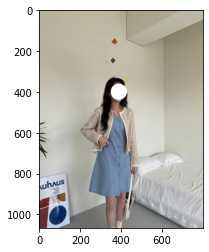

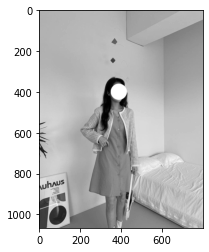

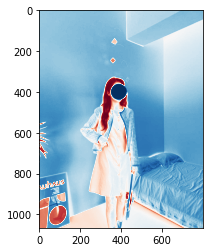

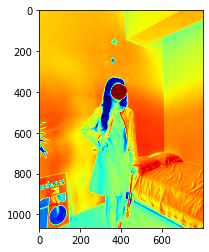

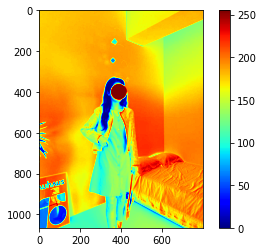

In [ ]:
plt.imshow(im)
plt.show()

#이미지 흑백으로 열기
image_pil = Image.open(path).convert("L")
image_bw = np.array(image_pil)

plt.imshow(image_bw,'gray')
plt.show()


#이미지 red, blue로 열기
plt.imshow(image_bw,'RdBu')
plt.show()

#이미지 jet로 열기
plt.imshow(image_bw,'jet')
plt.show()

#color bar 추가하기
plt.imshow(image_bw,'jet')
plt.colorbar()
plt.show()

In [ ]:
resized_image = cv2.resize(pix,(275,183))
resized_image.shape

(183, 275, 3)